In [4]:
import json
from misc import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [5]:
from autoPyTorch import AutoNetRegression

In [6]:
from sklearn.model_selection import train_test_split

# English

In [7]:
data = pd.read_csv("english_1hot.csv")
X = data.values[:,1:-1].astype(np.float32)
Y = data.values[:,-1:].reshape(-1,).astype(np.float32)
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2)    

In [5]:
auto = AutoNetRegression(
    "tiny_cs",
    log_level='info',
    max_runtime=300,
    min_budget=30,
    max_budget=90
)

/home/bakirillov/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
auto.fit(train_X, train_Y, validation_split=0.1)

11:12:16 [AutoNet] Start bohb
11:12:16 DISPATCHER: started the 'discover_worker' thread
11:12:16 WORKER: start listening for jobs
11:12:16 DISPATCHER: started the 'job_runner' thread
11:12:16 DISPATCHER: Pyro daemon running on 192.168.1.222:44639
11:12:16 DISPATCHER: discovered new worker, hpbandster.run_0.worker.bakirillov-Alienware-17-R5.6559.-1139986497099584
11:12:16 HBMASTER: adjusted queue size to (0, 1)
11:12:16 DISPATCHER: A new worker triggered discover_worker
11:12:16 HBMASTER: starting run at 1586074336.2860525
11:12:16 WORKER: start processing job (0, 0, 0)
11:12:16 Fit optimization pipeline
11:12:16 [AutoNet] No validation set given and either no cross validator given or budget too low for CV. Continue by splitting 0.1 of training data.
11:12:16 [AutoNet] CV split 0 of 1
11:12:16 Reduced initial budget 29.868019819259644 to cv budget 29.86724877357483 compensate for 0.0007710456848144531
11:12:36 Finished train with budget 29.86724877357483: Preprocessing took 2s, Training

{'optimized_hyperparameter_config': {'CreateDataLoader:batch_size': 125,
  'Imputation:strategy': 'median',
  'InitializationSelector:initialization_method': 'default',
  'InitializationSelector:initializer:initialize_bias': 'No',
  'LearningrateSchedulerSelector:lr_scheduler': 'cosine_annealing',
  'LossModuleSelector:loss_module': 'l1_loss',
  'NetworkSelector:network': 'shapedresnet',
  'NormalizationStrategySelector:normalization_strategy': 'standardize',
  'OptimizerSelector:optimizer': 'sgd',
  'PreprocessorSelector:preprocessor': 'truncated_svd',
  'ResamplingStrategySelector:over_sampling_method': 'none',
  'ResamplingStrategySelector:target_size_strategy': 'none',
  'ResamplingStrategySelector:under_sampling_method': 'none',
  'TrainNode:batch_loss_computation_technique': 'standard',
  'LearningrateSchedulerSelector:cosine_annealing:T_max': 10,
  'LearningrateSchedulerSelector:cosine_annealing:T_mult': 2,
  'NetworkSelector:shapedresnet:activation': 'relu',
  'NetworkSelector:

In [8]:
train_Yhat = auto.predict(train_X)

In [9]:
test_Yhat = auto.predict(test_X)

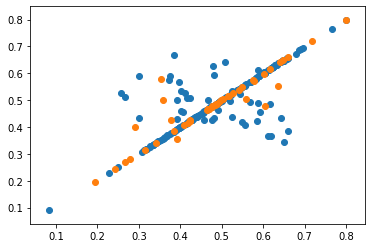

In [10]:
plt.scatter(train_Y, train_Yhat)
plt.scatter(test_Y, test_Yhat)

In [11]:
spearmanr(train_Y, train_Yhat), spearmanr(test_Y, test_Yhat)

(SpearmanrResult(correlation=0.7616791375022897, pvalue=1.180431424628274e-37),
 SpearmanrResult(correlation=0.8880781718487524, pvalue=1.7731786121138215e-17))

In [1]:
import torch

In [22]:
torch.save(auto, "auto.ptch")

In [3]:
auto = torch.load("auto.ptch")

/home/bakirillov/anaconda3/envs/lapki/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/home/bakirillov/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
